# Models Comparison

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pickle
import pandas as pd
import numpy as np
from scipy import stats
import statistics as stat
import time
import matplotlib.pyplot as plt

ad =  pd.read_csv('dataset.csv')

In [2]:
ad.loc[ad["CDR"] == 2,"CDR"] = 1
ad["Male"] = np.where(ad["M/F"]=="M", 1, 0)
ad["Female"] = np.where(ad["M/F"]=="F", 1, 0)

In [3]:
forest_model = pickle.load(open('alzheimer_forest.pkl', 'rb'))
tree_model = pickle.load(open('alzheimer_tree.pkl', 'rb'))
mLR_model = pickle.load(open('multiple_LR.pkl', 'rb'))

In [4]:
test_ad = ad.dropna()

In [5]:
mLR_X = test_ad.iloc[:,[10,13,14,16]] 
mLR_y = test_ad.iloc[:,[11]]
mLR_y= mLR_y.astype(str)

In [6]:
forest_X = test_ad.iloc[:,[3,4,7,8,9,10,11,13,14,16]] 
forest_y = test_ad.iloc[:,[2]]

In [7]:
tree_X = test_ad.iloc[:,[3,8,9,10,11,12,13]] 
tree_y = test_ad.iloc[:,[2]]

In [8]:
kf = KFold(n_splits=10, random_state=4, shuffle=True)
mLR_acc = []
mLR_pre = []
mLR_rec = []
mLR_time = []
forest_acc = []
forest_pre = []
forest_rec = []
forest_time = []
tree_acc = []
tree_pre = []
tree_rec = []
tree_time = []

    
for train_index, test_index in kf.split(test_ad):
    
    mLR_X_train, mLR_X_test = mLR_X.iloc[train_index,:], mLR_X.iloc[test_index,:]
    mLR_y_train, mLR_y_test = mLR_y.iloc[train_index,:], mLR_y.iloc[test_index,:]
    
    mLR_start= time.time()
    mLR_y_pred = mLR_model.predict(mLR_X_test)
    mLR_end = time.time()

    mLR_y_pred = np.around(mLR_y_pred * 2.0) / 2.0
    mLR_y_pred = mLR_y_pred.astype(str)

    mLR_time.append(mLR_end - mLR_start)

    mLR_acc.append(accuracy_score(mLR_y_test, mLR_y_pred))
    mLR_pre.append(precision_score(mLR_y_test, mLR_y_pred, average='macro',zero_division=1))
    mLR_rec.append(recall_score(mLR_y_test, mLR_y_pred, average='macro',zero_division=1))

    forest_X_train, forest_X_test = forest_X.iloc[train_index,:], forest_X.iloc[test_index,:]
    forest_y_train, forest_y_test = forest_y.iloc[train_index,:], forest_y.iloc[test_index,:]


    forest_start = time.time()
    forest_y_pred = forest_model.predict(forest_X_test)
    forest_end = time.time()

    forest_time.append(forest_end - forest_start)
    forest_acc.append(accuracy_score(forest_y_test, forest_y_pred))
    forest_pre.append(precision_score(forest_y_test, forest_y_pred, average='macro',zero_division=1))
    forest_rec.append(recall_score(forest_y_test, forest_y_pred, average='macro',zero_division=1))

    treet_X_train, tree_X_test = tree_X.iloc[train_index,:], tree_X.iloc[test_index,:]
    tree_y_train, tree_y_test = tree_y.iloc[train_index,:], tree_y.iloc[test_index,:]

    tree_start = time.time()
    tree_y_pred = tree_model.predict(tree_X_test)
    tree_end = time.time()


    tree_time.append(tree_end - tree_start)
    tree_acc.append(accuracy_score(tree_y_test, tree_y_pred))
    tree_pre.append(precision_score(tree_y_test, tree_y_pred,average='macro',zero_division=1))
    tree_rec.append(recall_score(tree_y_test, tree_y_pred, average='macro',zero_division=1))
    

### Accuracy Scores

In [9]:
print(mLR_acc)
print(stat.mean(mLR_acc))
print(forest_acc)
print(stat.mean(forest_acc))
print(tree_acc)
print(stat.mean(tree_acc))

[0.7222222222222222, 0.5277777777777778, 0.4722222222222222, 0.5833333333333334, 0.4857142857142857, 0.5714285714285714, 0.7428571428571429, 0.45714285714285713, 0.6571428571428571, 0.5714285714285714]
0.5791269841269842
[0.9444444444444444, 1.0, 0.9444444444444444, 0.9166666666666666, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143, 0.9714285714285714, 0.9428571428571428, 0.9428571428571428]
0.9405555555555556
[0.9444444444444444, 1.0, 0.8888888888888888, 0.9444444444444444, 0.9428571428571428, 0.8857142857142857, 0.8857142857142857, 0.9142857142857143, 0.9142857142857143, 0.9142857142857143]
0.9234920634920635


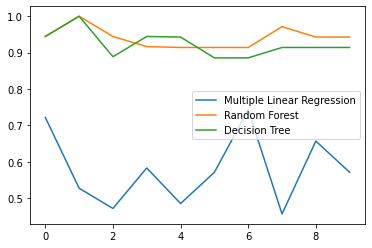

In [10]:
plt.plot(mLR_acc, label='Multiple Linear Regression')
plt.plot(forest_acc, label ='Random Forest')
plt.plot(tree_acc, label ='Decision Tree')
plt.legend()
plt.show()

Text(0.5, 0, 'Multiple Linear Regression Accuracy Rate')

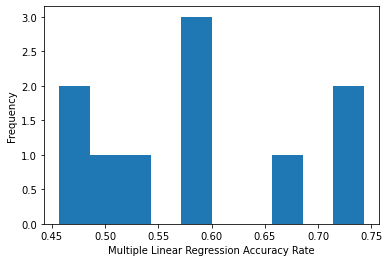

In [11]:
plt.hist(mLR_acc)
plt.ylabel('Frequency')
plt.xlabel('Multiple Linear Regression Accuracy Rate')

Text(0.5, 0, 'Decision Tree Accuracy Rate')

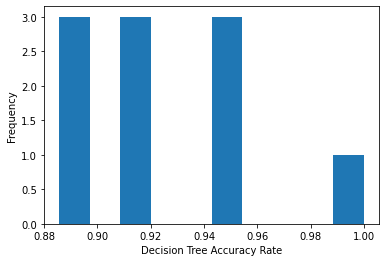

In [12]:
plt.hist(tree_acc)
plt.ylabel('Frequency')
plt.xlabel('Decision Tree Accuracy Rate')

Text(0.5, 0, 'Random Forest Accuracy Rate')

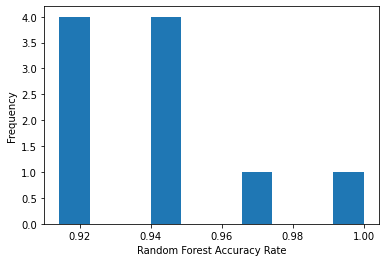

In [13]:
plt.hist(forest_acc)
plt.ylabel('Frequency')
plt.xlabel('Random Forest Accuracy Rate')

In [14]:
stats.wilcoxon(forest_acc, tree_acc, alternative ="greater")

c:\Users\Yin Man Li\AppData\Local\Programs\Python\Python37-32\lib\site-packages\scipy\stats\morestats.py:3141: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
c:\Users\Yin Man Li\AppData\Local\Programs\Python\Python37-32\lib\site-packages\scipy\stats\morestats.py:3155: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


WilcoxonResult(statistic=31.0, pvalue=0.030972360806982763)

### Precision Rate

In [15]:
print(mLR_pre)
print(stat.mean(mLR_pre))
print(forest_pre)
print(stat.mean(forest_pre))
print(tree_pre)
print(stat.mean(tree_pre))

[0.7595704948646125, 0.6188888888888888, 0.4015151515151515, 0.46904761904761905, 0.6958041958041958, 0.5069444444444444, 0.5200980392156863, 0.37777777777777777, 0.38666666666666666, 0.3563025210084034]
0.5092615799233446
[0.9666666666666667, 1.0, 0.8743961352657005, 0.8137254901960785, 0.8043478260869565, 0.9166666666666666, 0.7999999999999999, 0.9666666666666667, 0.9487179487179488, 0.9015151515151515]
0.8992702551781836
[0.9666666666666667, 1.0, 0.7848484848484848, 0.8703703703703702, 0.9722222222222222, 0.8924242424242425, 0.7444444444444445, 0.8796296296296297, 0.932051282051282, 0.8515151515151516]
0.8894172494172494


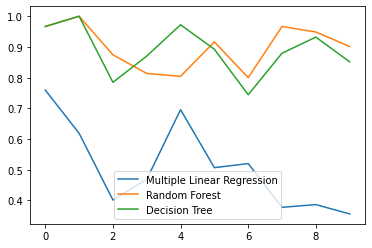

In [16]:
plt.plot(mLR_pre, label='Multiple Linear Regression')
plt.plot(forest_pre, label ='Random Forest')
plt.plot(tree_pre, label ='Decision Tree')
plt.legend()
plt.show()

Text(0.5, 0, 'Multiple Linear Regression Precision Score')

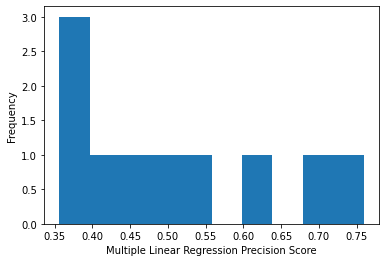

In [17]:
plt.hist(mLR_pre)
plt.ylabel('Frequency')
plt.xlabel('Multiple Linear Regression Precision Score')

Text(0.5, 0, 'Decision Tree Precision Score')

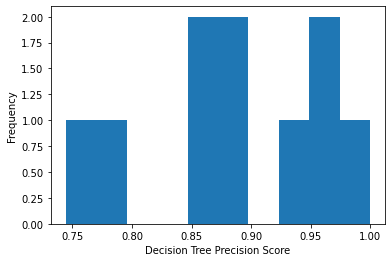

In [18]:
plt.hist(tree_pre)
plt.ylabel('Frequency')
plt.xlabel('Decision Tree Precision Score')

Text(0.5, 0, 'Random Forest Precision Score')

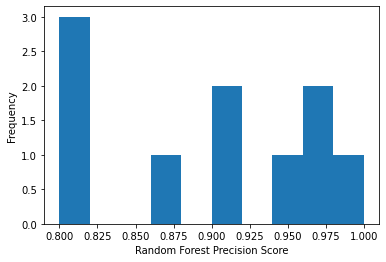

In [19]:
plt.hist(forest_pre)
plt.ylabel('Frequency')
plt.xlabel('Random Forest Precision Score')

In [20]:
stats.wilcoxon(forest_pre, tree_pre, alternative ="greater")

WilcoxonResult(statistic=23.0, pvalue=0.2419199256967841)

In [21]:
stats.wilcoxon(tree_pre, forest_pre, alternative ="greater")

WilcoxonResult(statistic=13.0, pvalue=0.7580800743032159)

In [22]:
stats.wilcoxon(tree_pre, forest_pre)

WilcoxonResult(statistic=13.0, pvalue=0.4838398513935682)

### Recall

In [23]:
print(mLR_rec)
print(stat.mean(mLR_rec))
print(forest_rec)
print(stat.mean(forest_rec))
print(tree_rec)
print(stat.mean(tree_rec))

[0.7286324786324787, 0.4880952380952381, 0.6208333333333333, 0.721474358974359, 0.37222222222222223, 0.49927849927849927, 0.7615384615384615, 0.3878787878787879, 0.8033333333333333, 0.725]
0.6108286713286714
[0.8125, 1.0, 0.8585858585858586, 0.8518518518518517, 0.7626262626262627, 0.8880952380952382, 0.753968253968254, 0.9523809523809524, 0.8666666666666667, 0.9015151515151515]
0.8648190235690236
[0.8125, 1.0, 0.8131313131313131, 0.8703703703703702, 0.7777777777777777, 0.8404761904761905, 0.7301587301587302, 0.8978000556947925, 0.7999999999999999, 0.8644781144781145]
0.8406692552087289


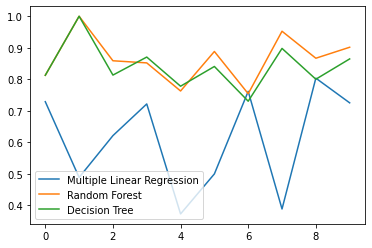

In [24]:
plt.plot(mLR_rec, label='Multiple Linear Regression')
plt.plot(forest_rec, label ='Random Forest')
plt.plot(tree_rec, label ='Decision Tree')
plt.legend()
plt.show()

Text(0.5, 0, 'Multiple Linear Regression Recall Score')

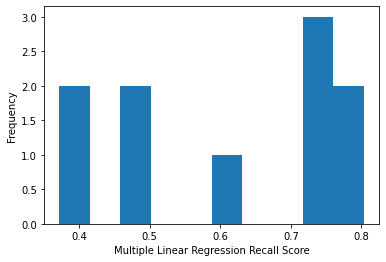

In [25]:
plt.hist(mLR_rec)
plt.ylabel('Frequency')
plt.xlabel('Multiple Linear Regression Recall Score')

Text(0.5, 0, 'Decision Tree Recall Score')

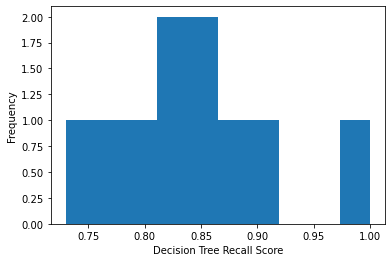

In [26]:
plt.hist(tree_rec)
plt.ylabel('Frequency')
plt.xlabel('Decision Tree Recall Score')

Text(0.5, 0, 'Forest Recall Score')

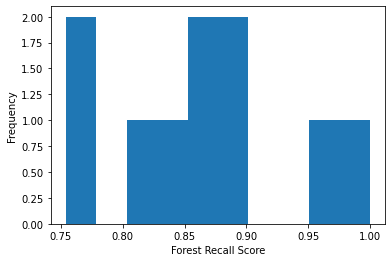

In [27]:
plt.hist(forest_rec)
plt.ylabel('Frequency')
plt.xlabel('Forest Recall Score')

In [28]:
stats.wilcoxon(forest_rec, tree_rec, alternative ="greater")

WilcoxonResult(statistic=33.0, pvalue=0.017845950058402206)

In [29]:
stats.wilcoxon(tree_rec, forest_rec, alternative ="greater")

WilcoxonResult(statistic=3.0, pvalue=0.9821540499415978)

In [30]:
stats.wilcoxon(mLR_rec, tree_rec, alternative ="greater")

WilcoxonResult(statistic=3.0, pvalue=0.9970703125)

In [31]:
stats.wilcoxon(mLR_rec, forest_rec, alternative ="greater")

WilcoxonResult(statistic=1.0, pvalue=0.9990234375)

In [32]:
stats.wilcoxon(tree_rec, mLR_rec, alternative = "greater")

WilcoxonResult(statistic=52.0, pvalue=0.0048828125)

In [33]:
stats.wilcoxon(forest_rec, mLR_rec, alternative = "greater")

WilcoxonResult(statistic=54.0, pvalue=0.001953125)

### Execution Time

In [34]:
print(mLR_time)
print(stat.mean(mLR_time))
print(forest_time)
print(stat.mean(forest_time))
print(tree_time)
print(stat.mean(tree_time))

[0.003988027572631836, 0.002995014190673828, 0.000985860824584961, 0.0009980201721191406, 0.0029449462890625, 0.000997304916381836, 0.001997709274291992, 0.0009958744049072266, 0.0019910335540771484, 0.0019960403442382812]
0.001988983154296875
[0.010971784591674805, 0.0070111751556396484, 0.006981849670410156, 0.006980419158935547, 0.00795745849609375, 0.009970903396606445, 0.0059833526611328125, 0.011969804763793945, 0.005981922149658203, 0.006016731262207031]
0.007982540130615234
[0.002026081085205078, 0.000997304916381836, 0.0029942989349365234, 0.001995563507080078, 0.001993417739868164, 0.000997304916381836, 0.0009903907775878906, 0.0029909610748291016, 0.001994609832763672, 0.000997781753540039]
0.0017977714538574218


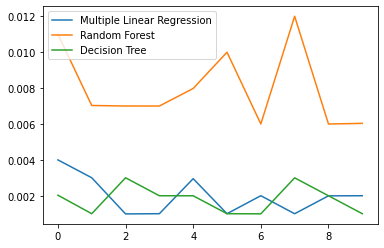

In [35]:
plt.plot(mLR_time, label='Multiple Linear Regression')
plt.plot(forest_time, label ='Random Forest')
plt.plot(tree_time, label ='Decision Tree')
plt.legend()
plt.show()

Text(0.5, 0, 'Multiple Linear Regression Execution Time')

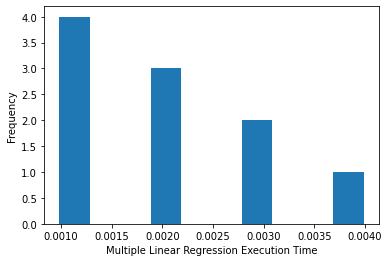

In [36]:
plt.hist(mLR_time)
plt.ylabel('Frequency')
plt.xlabel('Multiple Linear Regression Execution Time')

Text(0.5, 0, 'Decision Tree Execution Time')

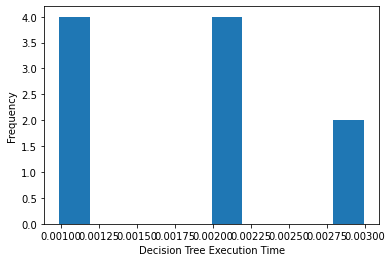

In [37]:
plt.hist(tree_time)
plt.ylabel('Frequency')
plt.xlabel('Decision Tree Execution Time')

Text(0.5, 0, 'Random Forest Execution Time')

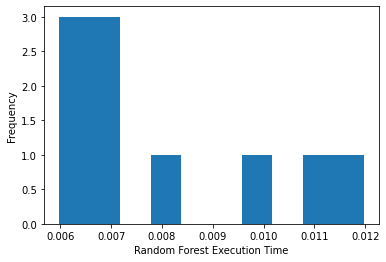

In [38]:
plt.hist(forest_time)
plt.ylabel('Frequency')
plt.xlabel('Random Forest Execution Time')

In [39]:
stats.wilcoxon(mLR_time, tree_time, alternative ="less")

WilcoxonResult(statistic=25.0, pvalue=0.6164515657948614)

In [40]:
stats.wilcoxon(mLR_time, forest_time, alternative ="less")

WilcoxonResult(statistic=0.0, pvalue=0.0009765625)

In [41]:
stats.wilcoxon(tree_time, forest_time, alternative ="less")

WilcoxonResult(statistic=0.0, pvalue=0.0009765625)

In [42]:
stats.wilcoxon(tree_time, mLR_time, alternative ="less")

WilcoxonResult(statistic=20.0, pvalue=0.3835484342051386)

In [43]:
stats.wilcoxon(tree_time, mLR_time)

WilcoxonResult(statistic=20.0, pvalue=0.7670968684102772)